## Load

In [ ]:
#gdrive connect
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
!pip install torch torchvision transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!pip install rouge-score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter

In [ ]:
#imports
import json
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from transformers import BertTokenizer
import os
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from collections import Counter
from collections import defaultdict

In [ ]:
from collections import defaultdict
import random
import torch.nn.functional as F

In [ ]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
from rouge_score import rouge_scorer
# from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
import random
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import re
from nltk.translate.bleu_score import corpus_bleu

## GPU

In [ ]:
!nvidia-smi

Wed Jun 19 22:09:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   31C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# #loading the dataset
# def load_synthetic_data(file_path):
#     data = []
#     with open(file_path, 'r') as f:
#         for line in f:
#             data.append(json.loads(line.strip()))
#     return data

In [ ]:
# file_path = '/content/drive/My Drive/fyp/FYP/synthetic_pairs.jsonl'

In [ ]:
# data = load_synthetic_data(file_path)

In [ ]:
# print(json.dumps(data[:2], indent=2))

[
  {
    "json": "{\"style\": \"Professional\", \"component_name\": \"Button\", \"subtype\": \"Default\", \"variant_details\": {\"State\": [\"Default\"], \"Size\": [\"Small\"]}, \"name\": \"State=Default, Size=Small\", \"type\": \"COMPONENT\", \"backgroundColor\": {\"r\": 0.0, \"g\": 0.0, \"b\": 0.0, \"a\": 0.0}, \"absoluteBoundingBox\": {\"x\": -4633.0, \"y\": -2143.0, \"width\": 105.0, \"height\": 36.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"_Button base\", \"type\": \"FRAME\", \"backgroundColor\": {\"r\": 0.49640899896621704, \"g\": 0.33841174840927124, \"b\": 0.849823534488678, \"a\": 1.0}, \"absoluteBoundingBox\": {\"x\": -4633.0, \"y\": -2143.0, \"width\": 105.0, \"height\": 36.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"Text\", \"type\": \"TEXT\", \"backgroundColor\": {}, \"absoluteBoundingBox\": {\"x\": -4619.0, \"y\": -2135.0, \"width\": 77.0, \"height\": 20.0}, \

In [ ]:
# from numba import cuda

# cuda.select_device(0) # choosing second GPU

# cuda.close()

## Loading

In [ ]:
#loading the json dataset
def load_json_data(file_path):
  with open(file_path, 'r') as f:
    data = [json.loads(line.strip()) for line in f]
  return data

In [ ]:
#loading the description dataset
def load_text_data(file_path):
  with open(file_path, 'r') as f:
    data = [line.strip() for line in f]
  return data

In [ ]:
#paths to the datasets
json_file_path='/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/json_data.jsonl'
text_file_path= '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/descriptions_data.txt'

In [ ]:
json_data= load_json_data(json_file_path)
descriptions=load_text_data(text_file_path)

In [ ]:
print(f"Length of JSON data: {len(json_data)}")
print(f"Length of description data: {len(descriptions)}")


Length of JSON data: 169450
Length of description data: 169450


In [ ]:
data = [{'json':json.dumps(json_data[i]), 'description':descriptions[i]} for i in range(len(json_data))]

In [ ]:
print(f"First JSON entry:{data[0]['json']}")
print(f"First description entry: {data[0]['description']}")
print(f"Second JSON entry:{data[1]['json']}")
print(f"Second description entry: {data[1]['description']}")

First JSON entry:{"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "padding": 0, "width": 77.0, "height": 20.0, "x": -4619.0, "y": -2135.0, "hasIcon": false, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": {"State": ["Default"], "Size": ["Small"]}}}
First description entry: Create a  Button .
Second JSON entry:{"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000

## Preprocess and tokenization

In [ ]:
#flattening JSON and create tokenized pairs
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#preprocess
def preprocess_dataset(data, tokenizer):
  """ method to preprocess the dataset

  Parameters
  data- data input
  tokenizere- tokenizer used for tokenization bert

  Returns
  input_ids, target_ids, component_types
  """
  #input-json, target-description
  inputs, targets= [], []
  component_types= []
  for item in data:
    #json
    json_str =item['json']
    #description
    description= item['description']
    inputs.append(json_str)
    targets.append(description)

    #extract component type-----CLASS WEIGHTS
    item_dict= json.loads(json_str)
    component_type= item_dict.get('variant_properties', {}).get('component_name', 'Unknown')
    component_types.append(component_type)

  #tokenize
  input_ids =tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")['input_ids']
  target_ids= tokenizer(targets, padding=True, truncation=True, return_tensors="pt")['input_ids']
  return input_ids, target_ids, component_types

In [ ]:
input_ids, target_ids, component_types= preprocess_dataset(data, tokenizer)

In [ ]:
# ##NOTE ALWAYS!!
# def save_preprocessed_data(input_ids, target_ids, component_types, output_dir):
#   if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

#   torch.save(input_ids, os.path.join(output_dir, 'input_ids.pt'))
#   torch.save(target_ids, os.path.join(output_dir, 'target_ids.pt'))

#   with open(os.path.join(output_dir, 'component_types.json'), 'w') as f:
#     json.dump(component_types, f)

#   print(f"Data saved to {output_dir}")

In [ ]:
preprocessed_data_bert = '/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/BERT Preprocessed Data new'

In [ ]:
#NOT ALWAYS!
# save_preprocessed_data(input_ids, target_ids, component_types, preprocessed_data_bert)

Data saved to /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/BERT Preprocessed Data new


In [ ]:
def load_preprocessed_data(input_dir):
  """ method to load the preprocessed data
  Parameters
  input_dir- directory where the preprocessed data is stored
  Returns
  input_ids, target_ids, component_types
  """
  input_ids = torch.load(os.path.join(input_dir, 'input_ids.pt'))
  target_ids = torch.load(os.path.join(input_dir, 'target_ids.pt'))
  with open(os.path.join(input_dir, 'component_types.json'), 'r') as f:
    component_types = json.load(f)
  return input_ids, target_ids, component_types

In [ ]:
input_ids, target_ids, component_types = load_preprocessed_data(preprocessed_data_bert)

In [ ]:
print("input shape testing:", input_ids.shape)
print("target shape", target_ids.shape)

input shape testing: torch.Size([169450, 512])
target shape torch.Size([169450, 90])


In [ ]:
print("Sample input IDs:",input_ids[:5])
print("Sample target IDs:",target_ids[:5])

Sample input IDs: tensor([[ 101, 1063, 1000,  ...,    0,    0,    0],
        [ 101, 1063, 1000,  ...,    0,    0,    0],
        [ 101, 1063, 1000,  ...,    0,    0,    0],
        [ 101, 1063, 1000,  ...,    0,    0,    0],
        [ 101, 1063, 1000,  ...,    0,    0,    0]])
Sample target IDs: tensor([[  101,  3443,  1037,  6462,  1012,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0

In [ ]:
def calculate_class_weights(component_types, multiplier=1.05, max_weight=10):
  """ method to calculate the weights
  pArameters
  component_types-button
  multiplier-value to multiply
  max-weight- 10 here
  Returns
  class_weights-dictionary
  """

  #Count of components
  component_counts = Counter(component_types)
  total_count = sum(component_counts.values())
  class_weights = {comp: total_count / count for comp, count in component_counts.items()}

  #multiplier and cap weights
  for comp in class_weights:
    if comp != 'Button':
      class_weights[comp] = min(class_weights[comp] * multiplier, max_weight)

  return class_weights

In [ ]:
class_weights = calculate_class_weights(component_types, multiplier=1.05, max_weight=10)

In [ ]:
print(f"Class weights: {class_weights}")

Class weights: {'Button': 1.9882896836571857, 'input-field': 8.260864518525398, 'icon-button': 6.996834323017028, 'Label': 8.638272563965627, 'menu': 10, 'list-item': 10}


## Dataset and model

In [ ]:
#split into train test validation sets80 10 10
input_ids_train, input_ids_temp, target_ids_train, target_ids_temp, component_types_train, component_types_temp= train_test_split(input_ids, target_ids, component_types, test_size=0.2, random_state=42)
input_ids_val, input_ids_test, target_ids_val, target_ids_test, component_types_val, component_types_test=train_test_split(input_ids_temp, target_ids_temp, component_types_temp, test_size=0.5, random_state=42)


In [ ]:
class GRUDataset(Dataset):
  """ Custom dataset class for description generation """
  #initialise with input and tgt ids
  def __init__(self, input_ids, target_ids, component_types, class_weights):
    self.input_ids = input_ids
    self.target_ids = target_ids
    self.component_types = component_types
    self.class_weights = class_weights

  #get length
  def __len__(self):
    return len(self.input_ids)

  #get item
  def __getitem__(self, idx):
    input_id = self.input_ids[idx]
    target_id = self.target_ids[idx]
    component_type = self.component_types[idx]
    weight = self.class_weights.get(component_type, 1.0)
    return input_id, target_id, weight

In [ ]:
#dataset
train_dataset= GRUDataset(input_ids_train, target_ids_train, component_types_train, class_weights)
val_dataset= GRUDataset(input_ids_val, target_ids_val, component_types_val, class_weights)
test_dataset= GRUDataset(input_ids_test, target_ids_test, component_types_test, class_weights)


In [ ]:
#datalaoder for train test validation
train_dataloader= DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader= DataLoader(val_dataset, batch_size=32, shuffle=False)
test_dataloader= DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class Seq2SeqGRU(nn.Module):
  """ Custom Seq2Seq model class for description generation """
  #inherit from torch.nn.Module!!!!!!!!!!!!!!!!
  def __init__(self, input_dim, emb_dim, hidden_dim, output_dim, num_layers):
    """ Initialize the model input_dim-input vocab size, emb_dim-embedding vector size,
    hidden_dim-hidden state no of features, output_dim-output vocab size, num_layers-recurrent layers in gru"""
    #call nn.Module constructureeeeeee of paruent
    super(Seq2SeqGRU, self).__init__()
    #create embedding layer tp convert input tokens to dense vectors to emb dim
    self.embedding = nn.Embedding(input_dim, emb_dim)
    #gru created for encoder!! emb_dim-input dimention to gru, input and output tensors are of shape (batch_size, seq_length, feature_dim)
    self.encoder = nn.GRU(emb_dim, hidden_dim, num_layers, batch_first=True)
    #gru created!!for decoder
    self.decoder = nn.GRU(emb_dim, hidden_dim, num_layers, batch_first=True)
    #create fclayer, output of decoder projected it to output output_dim
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, src, tgt):
    """ forward pass of the model src-input seq(json), tgt-tgt output seq(desc) """
    #convert input tokens into dense vectors
    embedded_src = self.embedding(src)
    #passes the embedded source sequence through the encoder GRU
    #output-output of gru, hidden-hidden state of gru
    encoder_output, hidden = self.encoder(embedded_src)

    #convert tgt tokens to dense vectors
    embedded_tgt = self.embedding(tgt)
    #through decoder gru. #output-output of gru, hidden-hidden state of gru
    decoder_output, hidden = self.decoder(embedded_tgt, hidden)
  #output through fc. generate final token predictions
    output = self.fc(decoder_output)
    return output


In [ ]:
#dimentions
input_dimentions= tokenizer.vocab_size
embedding_dimentions= 512
hidden_dimentions= 512
output_dimentions= tokenizer.vocab_size
layers_numbers= 3

In [ ]:
#model
model = Seq2SeqGRU(input_dimentions,embedding_dimentions,hidden_dimentions,output_dimentions,layers_numbers).to(device)

In [ ]:
print(model)

Seq2SeqGRU(
  (embedding): Embedding(30522, 512)
  (encoder): GRU(512, 512, num_layers=3, batch_first=True)
  (decoder): GRU(512, 512, num_layers=3, batch_first=True)
  (fc): Linear(in_features=512, out_features=30522, bias=True)
)


In [ ]:
#optimizer and criterion for loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
def validate(model, dataloader, criterion):
  """ method to validate the model
 Parameters
 model- model used for validation
 dataloader- dataloader used for validation
 criterion- loss function used for validation
 Returns
 avg_loss
  """
  model.eval()
  total_loss = 0
  with torch.no_grad():#no grad
  #batchs of validation data
    for src, tgt, _ in dataloader:
      src, tgt = src.to(device), tgt.to(device)
      #exclude last token of tgt seq
      output = model(src, tgt[:, :-1])
      #calculate loss,reshape output tensor,reshape tgt tensor
      loss = criterion(output.view(-1, output_dimentions), tgt[:, 1:].reshape(-1))
      total_loss += loss.item()
  avg_loss = total_loss / len(dataloader)
  return avg_loss

In [ ]:
def train(model, train_dataloader, val_dataloader, optimizer, criterion, epochs, checkpoint_path):
  """ method to train the model
  Parameters
  model- model used for training
  train_dataloader- dataloader used for training
  val_dataloader- dataloader used for validation
  optimizer- optimizer used for training
  criterion- loss function used for training
  epochs- number of epochs for training
  checkpoint_path- path to save the checkpoints]

  """
  model.train()
  for epoch in range(epochs):
    model.train()
    total_loss = 0
    for i, (src, tgt, weight) in enumerate(train_dataloader):
      src, tgt, weight = src.to(device), tgt.to(device), weight.to(device)
      #####c;eartrrrrr
      optimizer.zero_grad()
      output = model(src, tgt[:, :-1])
      loss = criterion(output.view(-1, output_dimentions), tgt[:, 1:].contiguous().view(-1))
      #class weight
      weighted_loss = (loss * weight.view(-1)).mean()
      #backpropagate loss
      weighted_loss.backward()
      optimizer.step()
      total_loss += weighted_loss.item()
      if i % 100 == 0:
        #every 100 batches
        print(f'Epoch {epoch+1}/{epochs}, Step {i+1}/{len(train_dataloader)}, Loss: {weighted_loss.item()}')
      #loss
      avg_train_loss = total_loss / len(train_dataloader)
      avg_val_loss = validate(model, val_dataloader, criterion)

      print(f'Epoch {epoch+1} completed. Average Training Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}')
      save_model_checkpoint(model, epoch + 1, checkpoint_path)


In [ ]:
#path
checkpoint_path = '/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints'

In [ ]:
if not os.path.exists(checkpoint_path):
  os.makedirs(checkpoint_path)

In [ ]:
# print(f"Checkpoint directory: {checkpoint_path}")

In [ ]:
#ONLY IF RUN AGAIN
# def save_model_checkpoint(model, epoch, checkpoint_path):
#   """ method to save the model checkpoint
#   Parameters
#   model- model used for saving
#   epoch- epoch number"""
#   checkpoint_file = os.path.join(checkpoint_path, f'seq2seq_gru_epoch{epoch}.pth')
#   torch.save(model.state_dict(), checkpoint_file)
#   print(f'Checkpoint saved for epoch {epoch} at {checkpoint_file}')

### Train again

In [ ]:
epochs=8

In [ ]:
epoch_to_resume = 5

In [ ]:
train(model, train_dataloader, val_dataloader, optimizer, criterion, epochs=8, checkpoint_path=checkpoint_path)

Epoch 1/8, Step 1/4237, Loss: 0.39786455035209656
Epoch 1/8, Step 101/4237, Loss: 0.4038407559832833
Epoch 1/8, Step 201/4237, Loss: 0.3761422556478047
Epoch 1/8, Step 301/4237, Loss: 0.30455589523574006
Epoch 1/8, Step 401/4237, Loss: 0.4243213570693928
Epoch 1/8, Step 501/4237, Loss: 0.28296840387915223
Epoch 1/8, Step 601/4237, Loss: 0.38167953173502434
Epoch 1/8, Step 701/4237, Loss: 0.433426480301982
Epoch 1/8, Step 801/4237, Loss: 0.32360550577421865
Epoch 1/8, Step 901/4237, Loss: 0.3119538498075463
Epoch 1/8, Step 1001/4237, Loss: 0.3061970892323954
Epoch 1/8, Step 1101/4237, Loss: 0.32403983817659454
Epoch 1/8, Step 1201/4237, Loss: 0.44738224148750305
Epoch 1/8, Step 1301/4237, Loss: 0.35719029976833194
Epoch 1/8, Step 1401/4237, Loss: 0.4109984495852026
Epoch 1/8, Step 1501/4237, Loss: 0.37389902074393244
Epoch 1/8, Step 1601/4237, Loss: 0.3737092801436401
Epoch 1/8, Step 1701/4237, Loss: 0.33231983012320965
Epoch 1/8, Step 1801/4237, Loss: 0.31511154478595693
Epoch 1/8, Ste

In [ ]:
#NOT ALWAYS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def load_model_checkpoint(model, checkpoint_path, epoch):
  """ method to load the model checkpoint
  Parameters
  model- model used for loading"""
  checkpoint_file = os.path.join(checkpoint_path, f'seq2seq_gru_epoch{epoch}.pth')
  model.load_state_dict(torch.load(checkpoint_file))
  model.to(device)
  print(f'Model loaded from {checkpoint_file}')


In [ ]:
# checkpoint_epoch = 5
# load_model_checkpoint(model, checkpoint_path, checkpoint_epoch)

In [ ]:
from tqdm import tqdm

In [ ]:
# def train(model, train_dataloader, val_dataloader, optimizer, criterion, start_epoch, epochs, checkpoint_path):
#     """ Method to train the model AGIAIN!"""
#   for epoch in range(start_epoch, start_epoch + epochs):
#     model.train()
#     total_loss = 0
#     with tqdm(total=len(train_dataloader), desc=f'Epoch {epoch+1}/{start_epoch + epochs}') as pbar:
#       for i, (src, tgt, weight) in enumerate(train_dataloader):
#         src, tgt, weight = src.to(device), tgt.to(device), weight.to(device)
#         optimizer.zero_grad()
#         output = model(src, tgt[:, :-1])
#         #loss
#         loss = criterion(output.view(-1, output_dimentions), tgt[:, 1:].contiguous().view(-1))
#         #weighted loss
#         weighted_loss = (loss * weight.view(-1)).mean()
#         weighted_loss.backward()
#         #optimizer
#         optimizer.step()
#         total_loss += weighted_loss.item()
#         pbar.set_postfix({'Loss': weighted_loss.item()})
#         pbar.update(1)
#     #loss
#     avg_train_loss = total_loss / len(train_dataloader)
#     avg_val_loss = validate(model, val_dataloader, criterion)

#     print(f'Epoch {epoch+1} completed. Average Training Loss: {avg_train_loss}, Average Validation Loss: {avg_val_loss}')
#     save_model_checkpoint(model, epoch + 1, checkpoint_path)

In [ ]:
# start_epoch = 5

In [ ]:
# load_model_checkpoint(model, checkpoint_path, start_epoch)

Model loaded from /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch5.pth


In [ ]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Train the model for 5 more epochs
train(model, train_dataloader, val_dataloader, optimizer, criterion, start_epoch=start_epoch, epochs=7, checkpoint_path=checkpoint_path)

Epoch 6/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.13it/s, Loss=0.464]


Epoch 6 completed. Average Training Loss: 0.2685236609795077, Average Validation Loss: 0.05232243126715129
Checkpoint saved for epoch 6 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch6.pth


Epoch 7/12: 100%|██████████| 4237/4237 [07:44<00:00,  9.13it/s, Loss=0.336]


Epoch 7 completed. Average Training Loss: 0.26733334175525864, Average Validation Loss: 0.05045878895611133
Checkpoint saved for epoch 7 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch7.pth


Epoch 8/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.13it/s, Loss=0.271]


Epoch 8 completed. Average Training Loss: 0.26364137206527866, Average Validation Loss: 0.051634021876555566
Checkpoint saved for epoch 8 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch8.pth


Epoch 9/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.14it/s, Loss=0.291]


Epoch 9 completed. Average Training Loss: 0.26028850458537456, Average Validation Loss: 0.05118731741775882
Checkpoint saved for epoch 9 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch9.pth


Epoch 10/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.14it/s, Loss=0.394]


Epoch 10 completed. Average Training Loss: 0.25817618884029947, Average Validation Loss: 0.05074947323860987
Checkpoint saved for epoch 10 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch10.pth


Epoch 11/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.13it/s, Loss=0.173]


Epoch 11 completed. Average Training Loss: 0.25715781472119703, Average Validation Loss: 0.050598485528860454
Checkpoint saved for epoch 11 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch11.pth


Epoch 12/12: 100%|██████████| 4237/4237 [07:43<00:00,  9.14it/s, Loss=0.222]


Epoch 12 completed. Average Training Loss: 0.25655666031550245, Average Validation Loss: 0.05043726517063267
Checkpoint saved for epoch 12 at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch12.pth


In [ ]:
# load_model_checkpoint(model, checkpoint_path, epoch=5)

Model loaded from /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_epoch5.pth


### Load and save

In [ ]:
#NOTE ALWAYS!
# def save_model(model, checkpoint_path):
#   """ Method to save the entire model
#   Parameters
#   model- model used for saving
#   checkpoint_path- path to save the checkpoints
#   """
#   model_file = os.path.join(checkpoint_path, 'seq2seq_gru_model.pth')
#   torch.save(model.state_dict(), model_file)
#   print(f'Model saved at {model_file}')

In [ ]:
def load_saved_model(model, checkpoint_path):
  """ Method to load the saved entire model
  Parameters
  model- model used for loading
  checkpoint_path- path to save the checkpoints
  """
  model_file = os.path.join(checkpoint_path, 'seq2seq_gru_model.pth')
  model.load_state_dict(torch.load(model_file))
  model.to(device)
  print(f'Model loaded from {model_file}')
  return model

In [ ]:
# save_model(model, checkpoint_path)

Model saved at /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_model.pth


In [ ]:
#LOAD
model = Seq2SeqGRU(input_dimentions, embedding_dimentions, hidden_dimentions, output_dimentions, layers_numbers)
model = load_saved_model(model, checkpoint_path)

Model loaded from /content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/New/GRU Model checkpoints/seq2seq_gru_model.pth


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

## Inferences

In [ ]:
component_types= ['Button', 'Label', 'input-field', 'list-item', 'menu', 'icon-button']

In [ ]:
generated_descriptions = defaultdict(list)

In [ ]:

#random shuffle
random.shuffle(json_data)


In [ ]:
def generate_description_for_json(model, json_input, tokenizer, max_len=50, temperature=1.0):
  """ inference method
  Parameters
  model- modelinput
  tokenizer-tokenizer
  json_input- inpur from dataset
  max_len- max length of generated description
  temperature- temperature for sampling

  Returns
  generated_description- generated description
  """
  model.eval()
  with torch.no_grad():
    inputs= tokenizer(json_input, return_tensors="pt", padding=True, truncation=True).to(device)
    input_ids = inputs['input_ids']

    #converts the input IDs to embeddings
    encoder_outputs, hidden = model.encoder(model.embedding(input_ids))

    # Start-of-sequence token
    sos_token_id =tokenizer.cls_token_id
    # End-of-sequence token
    eos_token_id =tokenizer.sep_token_id
    # Target input with sos token
    tgt_input = torch.tensor([[sos_token_id]], device=device)

    generated_tokens= []
    for _ in range(max_len):
        #go through decoder
        decoder_output, hidden = model.decoder(model.embedding(tgt_input), hidden)
        #output of decoder
        output_token = model.fc(decoder_output[:, -1, :])
        #temperature
        output_token = output_token / temperature
        #convert logits to probabilities
        probabilities = F.softmax(output_token, dim=-1)
        #next token
        next_token_id = torch.multinomial(probabilities, 1).item()

        if next_token_id== eos_token_id:
            break

        generated_tokens.append(next_token_id)
        tgt_input = torch.tensor([[next_token_id]], device=device)

    #to a string
    generated_description= tokenizer.decode(generated_tokens, skip_special_tokens=True)
    return generated_description

In [ ]:
# def generate_description_for_json(model, json_input, tokenizer, max_len=50):
#   """ inference method
#   Parameters
#   model- modelinput
#   tokenizer-tokenizer
#   json_input- inpur from dataset
#   max_len- max length of generated description

#   Returns
#   generated_description- generated description
#   """
#   model.eval()
#   with torch.no_grad():
#     #input otkenize it
#     inputs = tokenizer(json_input, return_tensors="pt", padding=True, truncation=True).to(device)
#     input_ids = inputs['input_ids']

#     #converts the input IDs to embeddings
#     encoder_outputs, hidden = model.encoder(model.embedding(input_ids))

#     # Start-of-sequence token
#     sos_token_id = tokenizer.cls_token_id
#     # End-of-sequence token
#     eos_token_id = tokenizer.sep_token_id
#     # Target input with sos token
#     tgt_input = torch.tensor([[sos_token_id]], device=device)

#     generated_tokens = []
#     for _ in range(max_len):
#       #go through decoder
#       decoder_output, hidden = model.decoder(model.embedding(tgt_input), hidden)
#       #output of decoder
#       output_token = model.fc(decoder_output[:, -1, :])
#       # next token
#       next_token_id = torch.argmax(output_token, dim=1).item()

#       if next_token_id == eos_token_id:
#         break

#       generated_tokens.append(next_token_id)
#       tgt_input = torch.tensor([[next_token_id]], device=device)

#     #back to string
#     generated_description = tokenizer.decode(generated_tokens, skip_special_tokens=True)
#     return generated_description


In [ ]:
#generate for each component_type
  count= 0
  for item in json_data:
    if count >= 2:
      break
    item_dict = json.loads(json.dumps(item))
    if item_dict.get('variant_properties', {}).get('component_name') == component_type:
      json_input= json.dumps(item)
      description =generate_description_for_json(model, json_input, tokenizer)
      generated_descriptions[component_type].append({'json': json_input, 'description': description})
      count +=1


In [ ]:
#print
for component_type,entries in generated_descriptions.items():
  print(f"Component: {component_type}")
  for entry in entries:
    print(f"JSON: {entry['json']}")
    print(f"Generated Description: {entry['description']}")
    print()

Component: Button
JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "padding": 0, "width": 77.0, "height": 20.0, "x": -4619.0, "y": -2135.0, "hasIcon": false, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": {"State": ["Default"], "Size": ["Small"]}}}
Generated Description: create a professional button with a stroke of 1. 0.

JSON: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color"

In [ ]:
json_input = {
  "variant_properties": {
    "color": "rgba(102, 112, 132, 1.0)",
    "strokes": ["rgba(207, 212, 220, 1.0)", "rgba(102, 112, 132, 1.0)", "rgba(152, 161, 178, 1.0)"],
    "strokeWeight": 1.0,
    "text": "This is a hint text to help user.",
    "textColor": "rgba(102, 112, 132, 1.0)",
    "borderRadius": 8.0,
    "fontFamily": "Inter",
    "fontWeight": 400,
    "fontSize": 14.0,
    "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}],
    "padding": 0,
    "width": 320.0,
    "height": 20.0,
    "x": 8092.0,
    "y": -1861.0,
    "style": "Professional",
    "component_name": "menu",
    "subtype": "Default",
    "variant_details": {"State": ["Default"]}
  }
}

In [ ]:
json_input_str = json.dumps(json_input)


In [ ]:
description = generate_description_for_json(model, json_input_str, tokenizer)

In [ ]:
print(f"Generated Description: {description}")

Generated Description: create a input - field with a stroke of 1. 0.


In [ ]:
example_json1 = "{\"style\": \"Professional\", \"component_name\": \"Button\", \"subtype\": \"Default\", \"variant_details\": {\"State\": [\"Default\"], \"Size\": [\"Small\"]}, \"name\": \"State=Default, Size=Small\", \"type\": \"COMPONENT\", \"backgroundColor\": {\"r\": 0.0, \"g\": 0.0, \"b\": 0.0, \"a\": 0.0}, \"absoluteBoundingBox\": {\"x\": -4633.0, \"y\": -2143.0, \"width\": 105.0, \"height\": 36.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"_Button base\", \"type\": \"FRAME\", \"backgroundColor\": {\"r\": 0.49640899896621704, \"g\": 0.33841174840927124, \"b\": 0.849823534488678, \"a\": 1.0}, \"absoluteBoundingBox\": {\"x\": -4633.0, \"y\": -2143.0, \"width\": 105.0, \"height\": 36.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"Text\", \"type\": \"TEXT\", \"backgroundColor\": {}, \"absoluteBoundingBox\": {\"x\": -4619.0, \"y\": -2135.0, \"width\": 77.0, \"height\": 20.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [], \"fills\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 1.0, \"g\": 1.0, \"b\": 1.0, \"a\": 1.0}}], \"strokes\": [], \"strokeWeight\": 1.0, \"effects\": [], \"characters\": \"Button CTA\", \"styles\": {\"fill\": \"1:4\", \"text\": \"1:8\"}, \"itemSpacing\": 0, \"visible\": true}], \"fills\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 0.49640899896621704, \"g\": 0.33841174840927124, \"b\": 0.849823534488678, \"a\": 1.0}}], \"strokes\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 0.49640899896621704, \"g\": 0.33841174840927124, \"b\": 0.849823534488678, \"a\": 1.0}}], \"strokeWeight\": 1.0, \"effects\": [{\"type\": \"DROP_SHADOW\", \"visible\": true, \"color\": {\"r\": 0.062745101749897, \"g\": 0.0941176488995552, \"b\": 0.1568627506494522, \"a\": 0.05000000074505806}, \"blendMode\": \"NORMAL\", \"offset\": {\"x\": 0.0, \"y\": 1.0}, \"radius\": 2.0, \"showShadowBehindNode\": true}], \"characters\": \"\", \"styles\": {\"strokes\": \"1:2\", \"stroke\": \"1:2\", \"effect\": \"1:3\"}, \"itemSpacing\": 8.0, \"visible\": true}], \"fills\": [{\"blendMode\": \"NORMAL\", \"visible\": false, \"type\": \"SOLID\", \"color\": {\"r\": 1.0, \"g\": 1.0, \"b\": 1.0, \"a\": 1.0}}], \"strokes\": [], \"strokeWeight\": 1.0, \"effects\": [], \"characters\": \"\", \"styles\": {}, \"itemSpacing\": 0, \"visible\": true}"
example_json2 = "{\"style\": \"Basic\", \"component_name\": \"input field\", \"subtype\": \"Default\", \"variant_details\": {\"State\": [\"Focused\"], \"Size\": [\"Medium\"]}, \"name\": \"State=Focused, Size=Medium\", \"type\": \"COMPONENT\", \"backgroundColor\": {\"r\": 1.0, \"g\": 1.0, \"b\": 1.0, \"a\": 1.0}, \"absoluteBoundingBox\": {\"x\": -200.0, \"y\": -400.0, \"width\": 200.0, \"height\": 50.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"_Input base\", \"type\": \"FRAME\", \"backgroundColor\": {\"r\": 0.9, \"g\": 0.9, \"b\": 0.9, \"a\": 1.0}, \"absoluteBoundingBox\": {\"x\": -200.0, \"y\": -400.0, \"width\": 200.0, \"height\": 50.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [{\"name\": \"Placeholder\", \"type\": \"TEXT\", \"backgroundColor\": {}, \"absoluteBoundingBox\": {\"x\": -190.0, \"y\": -390.0, \"width\": 180.0, \"height\": 30.0}, \"constraints\": {\"vertical\": \"TOP\", \"horizontal\": \"LEFT\"}, \"children\": [], \"fills\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 0.6, \"g\": 0.6, \"b\": 0.6, \"a\": 1.0}}], \"strokes\": [], \"strokeWeight\": 1.0, \"effects\": [], \"characters\": \"Enter text here\", \"styles\": {\"fill\": \"1:4\", \"text\": \"1:8\"}, \"itemSpacing\": 0, \"visible\": true}], \"fills\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 0.9, \"g\": 0.9, \"b\": 0.9, \"a\": 1.0}}], \"strokes\": [{\"blendMode\": \"NORMAL\", \"type\": \"SOLID\", \"color\": {\"r\": 0.8, \"g\": 0.8, \"b\": 0.8, \"a\": 1.0}}], \"strokeWeight\": 1.0, \"effects\": [], \"characters\": \"\", \"styles\": {\"strokes\": \"1:2\", \"stroke\": \"1:2\", \"effect\": \"1:3\"}, \"itemSpacing\": 8.0, \"visible\": true}], \"fills\": [{\"blendMode\": \"NORMAL\", \"visible\": false, \"type\": \"SOLID\", \"color\": {\"r\": 1.0, \"g\": 1.0, \"b\": 1.0, \"a\": 1.0}}], \"strokes\": [], \"strokeWeight\": 1.0, \"effects\": [], \"characters\": \"\", \"styles\": {}, \"itemSpacing\": 0, \"visible\": true}"


In [ ]:
generated_description1 = generate_description_for_json(model, example_json1, tokenizer)
generated_description2 = generate_description_for_json(model, example_json2, tokenizer)


In [ ]:
print(f"Generated description for example 1: {generated_description1}")
print(f"Generated description for example 2: {generated_description2}")

Generated description for example 1: create a button with a stroke of 1. 0 and border radius of 4. 0.
Generated description for example 2: create a basic button with a border radius of 4. 0.


In [ ]:
example_json1 = ""

In [ ]:
def generate_prompts(model, tokenizer, json_input, device, num_return_sequences=5):
  """inference method
  Parameters
  model- modelinput
  tokenizer-tokenizer
  json_input- inpur from dataset
  device-cuda or not
  num_return_sequences- number of return sequences

  Returns
  prompts- generated prompts
  """
  model.to(device)
  model.eval()
  input_text = "generate prompt: " + json.dumps(json_input)
  input_ids = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).input_ids.to(device)

  generated_ids = model.generate(
    input_ids,
    max_length=100,
    num_return_sequences=num_return_sequences,
    #randomness
    temperature=1.5,
    #top k candidates
    top_k=50,
    #nucleus sampling
    top_p=0.95,
    #sampling
    do_sample=True,
    no_repeat_ngram_size=2,
    early_stopping=False,
  )

  prompts = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]
  return prompts

In [ ]:
generated_description1 = generate_description_for_json(model, sample_json , tokenizer)


AttributeError: 'Seq2SeqGRU' object has no attribute 'generate'

In [ ]:
print(f"Generated description for example 1: {generated_description1}")

Generated description for example 1: create a label with a stroke of 2. 0 and border radius of 100. 0.


In [ ]:
#USE FOR WHOLE DATASET!
def generate_descriptions_for_dataset(model, data, tokenizer, max_len=50):
  """ inference method for dataset
  Parameters
  model- modelinput
  tokenizer-tokenizer
  data- dataset
  max_len- max length of generated description

  Returns
  generated_descriptions- generated descriptions
  """
  model.eval()
  generated_descriptions = []
  with torch.no_grad():
    for item in data:
      #json and descriptions
      json_input = item['json']
      generated_description = generate_description_for_json(model, json_input, tokenizer, max_len)
      generated_descriptions.append(generated_description)
  return generated_descriptions

In [ ]:
generated_descriptions= generate_descriptions_for_dataset(model, data, tokenizer)

In [ ]:
gru_descriptions_path='/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/gru_generated_data.txt'

In [ ]:
#ONLY TO SAVE!
# def save_generated_descriptions(generated_descriptions, output_file_path):
#   """ method to save the generated descriptions
#   Parameters
#   generated_descriptions- generated descriptions
#   output_file_path- path to save the generated descriptions
#   """
#   with open(output_file_path, 'w') as f:
#     for description in generated_descriptions:
#       f.write(description + '\n')

In [ ]:
def load_generated_descriptions(file_path):
  """ method to load the generated descriptions
  Parameters
  file_path- path to load the generated descriptions

  Returns
  generated_descriptions- generated descriptions
  """
  with open(file_path, 'r') as f:
    generated_descriptions = [line.strip() for line in f]
  return generated_descriptions

In [ ]:
save_generated_descriptions(generated_descriptions, gru_descriptions_path)

In [ ]:
generated_descriptions = load_generated_descriptions(gru_descriptions_path)

### Bleu

In [ ]:
reference_dict = {}
##refenercese

In [ ]:
for item in data:
  json_str = item['json']
  description = item['description']
  if json_str not in reference_dict:
    reference_dict[json_str] = []
  reference_dict[json_str].append(description)

In [ ]:
json_inputs = [item['json'] for item in data]


In [ ]:
references = []
hypotheses = []

In [ ]:
for json_input, generated_description in zip(json_inputs, generated_descriptions):
  #many descriptons for one json
  references.append([ref.split() for ref in reference_dict[json_input]])
  hypotheses.append(generated_description.split())


In [ ]:
#BLEU!
bleu_score = corpus_bleu(references, hypotheses, smoothing_function=SmoothingFunction().method1)
print(f'BLEU Score: {bleu_score}')

BLEU Score: 0.24021000105737286


In [ ]:
print("Example Reference: ", references[0])
print("Example Hypothesis: ", hypotheses[0])

Example Reference:  [['Create', 'a', 'Button', '.'], ['Create', 'a', 'Professional', 'Button.'], ['Create', 'a', 'Professional', 'Button.'], ['Create', 'a', 'Button', 'with', 'a', 'style', 'of', 'Professional', 'and', 'State', 'of', 'Default,', 'Size', 'of', 'Small.'], ['A', 'Button', 'with', 'border', 'radius', '10.0.'], ['A', 'Button', 'with', 'State', 'of', 'Default,', 'Size', 'of', 'Small.'], ['Generate', 'a', 'Professional', 'Button', 'with', 'border', 'radius', '10.0', 'and', 'State', 'of', 'Default,', 'Size', 'of', 'Small.'], ['Generate', 'a', 'Professional', 'Button', 'with', 'State', 'of', 'Default,', 'Size', 'of', 'Small.'], ['Create', 'a', 'Professional', 'Button', 'with', 'a', 'border', 'radius', 'of', '10.0.'], ['Create', 'a', 'Professional', 'Button', 'with', 'a', 'border', 'radius', 'of', '10.0.'], ['Generate', 'a', 'Button', 'with', 'State', 'of', 'Default,', 'Size', 'of', 'Small.'], ['Generate', 'a', 'Professional', 'Button', 'in', 'any', 'color', 'color.'], ['Generate

### ROUGE

In [ ]:
#initialise rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)


In [ ]:
#calculate
rouge_scores = [scorer.score(ref, hyp) for ref, hyp in zip([item['description'] for item in data], generated_descriptions)]


In [ ]:
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []


In [ ]:
for i, (refs, hyp) in enumerate(zip(references, hypotheses)):
  if i % 100 == 0:
    print(f'Processing {i}/{len(references)}')

  refs_text = [' '.join(ref) for ref in refs]
  hyp_text = ' '.join(hyp)
  scores = [scorer.score(ref, hyp_text) for ref in refs_text]

  #max score
  rouge1_scores.append(max(score['rouge1'].fmeasure for score in scores))
  rouge2_scores.append(max(score['rouge2'].fmeasure for score in scores))
  rougeL_scores.append(max(score['rougeL'].fmeasure for score in scores))


Processing 0/169450
Processing 100/169450
Processing 200/169450
Processing 300/169450
Processing 400/169450
Processing 500/169450
Processing 600/169450
Processing 700/169450
Processing 800/169450
Processing 900/169450
Processing 1000/169450
Processing 1100/169450
Processing 1200/169450
Processing 1300/169450
Processing 1400/169450
Processing 1500/169450
Processing 1600/169450
Processing 1700/169450
Processing 1800/169450
Processing 1900/169450
Processing 2000/169450
Processing 2100/169450
Processing 2200/169450
Processing 2300/169450
Processing 2400/169450
Processing 2500/169450
Processing 2600/169450
Processing 2700/169450
Processing 2800/169450
Processing 2900/169450
Processing 3000/169450
Processing 3100/169450
Processing 3200/169450
Processing 3300/169450
Processing 3400/169450
Processing 3500/169450
Processing 3600/169450
Processing 3700/169450
Processing 3800/169450
Processing 3900/169450
Processing 4000/169450
Processing 4100/169450
Processing 4200/169450
Processing 4300/169450


In [ ]:
#average score
rouge1 = sum(rouge1_scores) / len(rouge1_scores)
rouge2 = sum(rouge2_scores) / len(rouge2_scores)
rougeL = sum(rougeL_scores) / len(rougeL_scores)

In [ ]:
print(f'ROUGE-1: {rouge1}')
print(f'ROUGE-2: {rouge2}')
print(f'ROUGE-L: {rougeL}')

ROUGE-1: 0.9737767587196886
ROUGE-2: 0.9580701233123153
ROUGE-L: 0.9733928257482962


In [ ]:
def average_rouge_scores(rouge_scores):
  rouge1 = sum(score['rouge1'].fmeasure for score in rouge_scores) / len(rouge_scores)
  rouge2 = sum(score['rouge2'].fmeasure for score in rouge_scores) / len(rouge_scores)
  rougeL = sum(score['rougeL'].fmeasure for score in rouge_scores) / len(rouge_scores)
  return rouge1, rouge2, rougeL

In [ ]:
avg_rouge1, avg_rouge2, avg_rougeL = average_rouge_scores(rouge_scores)


In [ ]:
print(f'Average ROUGE-1: {avg_rouge1}')
print(f'Average ROUGE-2: {avg_rouge2}')
print(f'Average ROUGE-L: {avg_rougeL}')

Average ROUGE-1: 0.5045313033779053
Average ROUGE-2: 0.33625498430679035
Average ROUGE-L: 0.4914692047504469


## Stats

In [ ]:
def get_component_name_from_description(description):
  """method to get the component naems
  Parameters
  description- description input'
  Returns
  component_name- component name
  """
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower()

  #mornalise by removeing space and -
  normalized_description = description_lower.replace(" ", "").replace("-", "")

  for component in components:
      normalized_component = component.replace("-", "")
      if normalized_component in normalized_description:
          return component

  return 'Unknown'

In [ ]:

def calculate_component_metrics(true_components, generated_components):
  """method to calculate the component metrics
  Parameters
  true_components- true components
  generated_components- generated components
  Returns
  accuracy- accuracy
  precision- precision
  recall- recall
  f1- f1 score
  """
  #metrics
  accuracy = accuracy_score(true_components, generated_components) * 100
  precision = precision_score(true_components, generated_components, average='weighted') * 100
  recall = recall_score(true_components, generated_components, average='weighted') * 100
  f1 = f1_score(true_components, generated_components, average='weighted') * 100
  return accuracy, precision, recall, f1


In [ ]:
def evaluate_model(model, dataset, tokenizer, sample_size=10, max_len=50):
  """method to evaluate the model
  Parameters
  model- modelinput
  tokenizer-tokenizer
  dataset- dataset
  sample_size- sample size
  max_len- max length of generated description
  Returns
  metrics- metrics
  true_component_names- true components
  generated_component_names- generated components
  """
  model.eval()
  #sample
  sample_indices = random.sample(range(len(dataset)), sample_size)

  #real and generated names
  true_component_names= []
  generated_component_names = []

  for idx in sample_indices:
    #json and description
    json_input= dataset[idx]['json']
    true_descriptions_sample = dataset[idx]['description']
    true_component_name = json.loads(json_input).get('variant_properties', {}).get('component_name', 'Unknown').lower()
    #generate
    generated_description = generate_description_for_json(model, json_input, tokenizer, max_len)
    generated_component_name= get_component_name_from_description(generated_description)

    true_component_names.append(true_component_name)
    generated_component_names.append(generated_component_name)

    print(f"JSON Input: {json_input}")
    print(f"True Descriptions: {true_descriptions_sample}")
    print(f"Generated Description: {generated_description}")
    print(f"True Component Name: {true_component_name}")
    print(f"Generated Component Name: {generated_component_name}")
    print("----")
  #metrics
  component_accuracy, component_precision, component_recall, component_f1 = calculate_component_metrics(true_component_names, generated_component_names)

  metrics = {
    'Component Accuracy (%)': component_accuracy,
    'Component Precision (%)': component_precision,
    'Component Recall (%)': component_recall,
    'Component F1 (%)': component_f1,
  }

  return metrics, true_component_names, generated_component_names

In [ ]:
def progressive_evaluation(model, dataset, tokenizer, max_len=50):
  """method to evaluate the model
  Parameters
  model- modelinput
  tokenizer-tokenizer
  dataset- dataset
  max_len- max length of generated description
  Returns
  metrics- metrics
  true_component_names- true components
  generated_component_names- generated components
  """
  #sample sizes
  sample_sizes = [100, 200, 300, 400, 500]
  #metric lists
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []

  #true and generated
  all_true_components = []
  all_generated_components = []

  for sample_size in sample_sizes:
    metrics, true_components, generated_components = evaluate_model(model, dataset, tokenizer, sample_size=sample_size, max_len=max_len)
    accuracy_list.append(metrics['Component Accuracy (%)'])
    precision_list.append(metrics['Component Precision (%)'])
    recall_list.append(metrics['Component Recall (%)'])
    f1_list.append(metrics['Component F1 (%)'])
    all_true_components.extend(true_components)
    all_generated_components.extend(generated_components)
    print(f"Sample Size: {sample_size}, Metrics: {metrics}")

  #plotting
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, accuracy_list, label='Accuracy (%)', marker='o')
  plt.plot(sample_sizes, precision_list, label='Precision (%)', marker='o')
  plt.plot(sample_sizes, recall_list, label='Recall (%)', marker='o')
  plt.plot(sample_sizes, f1_list, label='F1 Score (%)', marker='o')
  plt.xlabel('Sample Size')
  plt.ylabel('Percentage')
  plt.title('Progressive Evaluation Metrics')
  plt.legend()
  plt.grid(True)
  plt.show()

  #Confusion Matrix
  labels= list(set(all_true_components))
  cm = confusion_matrix(all_true_components, all_generated_components, labels=labels)

  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  #ROC-AUC for each class
  plt.figure(figsize=(10, 7))
  for label in labels:
    true_binary = [1 if x == label else 0 for x in all_true_components]
    pred_binary = [1 if x == label else 0 for x in all_generated_components]
    fpr, tpr, _ = roc_curve(true_binary, pred_binary)
    auc = roc_auc_score(true_binary, pred_binary)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC for Each Class')
  plt.legend()
  plt.grid(True)
  plt.show()

Streaming output truncated to the last 5000 lines.
JSON Input: {"variant_properties": {"color": "rgba(230, 224, 233, 1.0)", "strokes": ["rgba(147, 143, 153, 1.0)", "rgba(9, 173, 234, 1.0)"], "strokeWeight": 0.0, "text": "Label", "textColor": "rgba(230, 224, 233, 1.0)", "borderRadius": 100.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.30000001192092896)"}, {"type": "DROP_SHADOW", "color": "rgba(0, 0, 0, 0.15000000596046448)"}], "padding": 0, "width": 35.0, "height": 20.0, "x": 4930.0, "y": 5236.0, "hasIcon": true, "style": "Trendy", "component_name": "Label", "subtype": "Dark", "variant_details": {"Style": ["elevated"], "Configuration": ["label & brand icon"], "State": ["focused"]}}}
True Descriptions: Design a Label in any color with Style of elevated, Configuration of label & brand icon, State of focused.
Generated Description: create a trendy label with a border radius of 100. 0.
True Component Name: labe

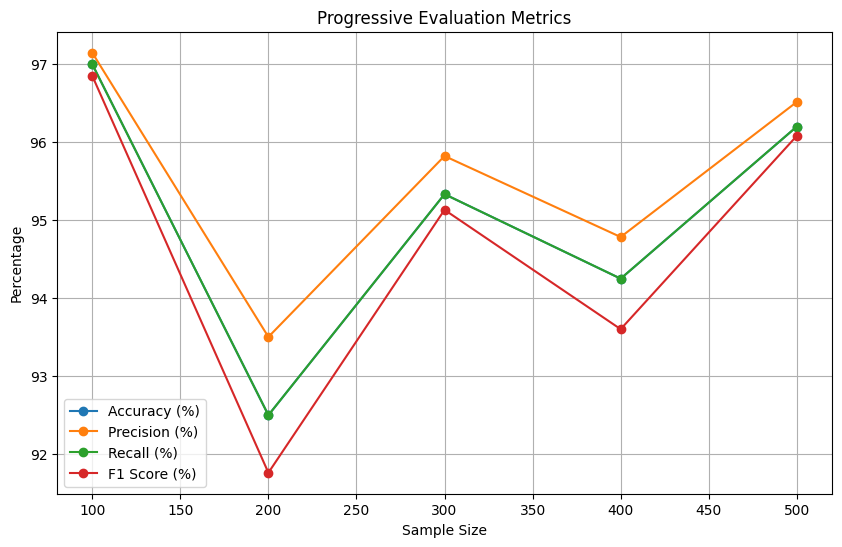

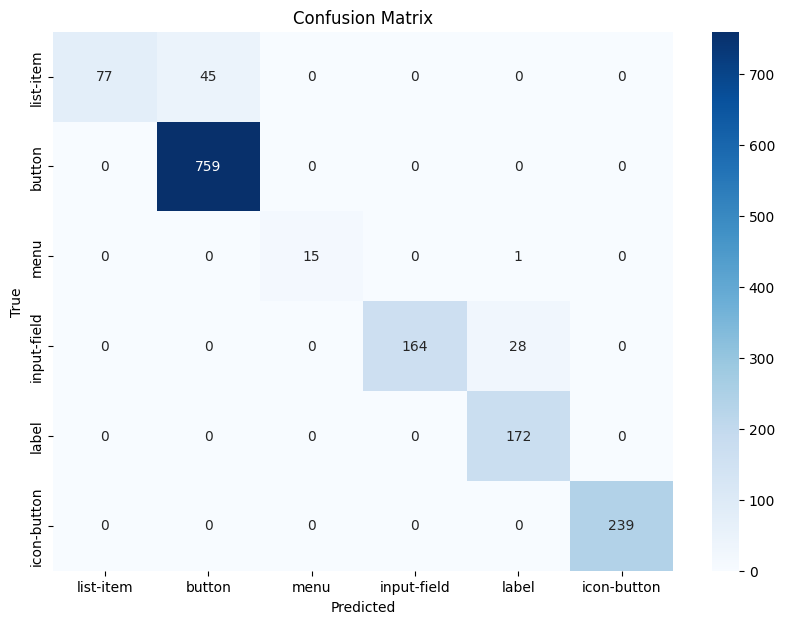

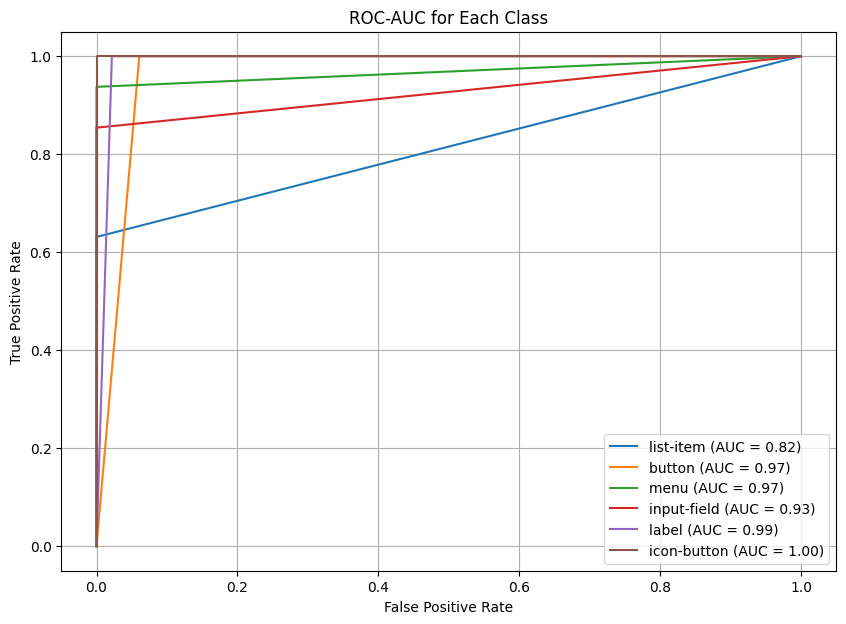

In [ ]:
progressive_evaluation(model, data, tokenizer, max_len=50)